In [219]:
#This jupyter notebook was prepared by “Gabriela Santiago”.

# 1.) Load Data and perform basic EDA 

import libraries necessary libraries 

In [220]:
 %matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
import sklearn
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix
from sklearn.metrics import confusion_matrix
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

 import the data to a dataframe and show the count of rows and columns (1 pt)

In [221]:
df = pd.read_csv('hrdata3.csv')
print("Rows: ", len(df))
print("Columns: ", len(df.columns))

Rows:  12977
Columns:  8


Show the top 5 and last 5 rows (1 pt)

In [222]:
df.head()

,Unnamed: 0,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target
0,1,29725,0.776,15,2,5,47,0.0
1,4,666,0.767,21,2,4,8,0.0
2,6,28806,0.920,5,2,1,24,0.0
3,7,402,0.762,13,0,5,18,1.0
4,8,27107,0.920,7,2,1,46,1.0


In [223]:
df.tail()

,Unnamed: 0,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target
12972,19149,251,0.920,9,2,1,36,1.0
12973,19150,32313,0.920,10,3,3,23,0.0
12974,19152,29754,0.920,7,1,1,25,0.0
12975,19155,24576,0.920,21,2,4,44,0.0
12976,19156,5756,0.802,0,4,2,97,0.0


Is there any null values on any column?

In [224]:
nulls = df.isnull().sum().to_frame('nulls') 
nulls.sort_values("nulls", inplace = True, ascending = False) 
for index, column in nulls.iteritems():
    print("Number of columns containing null values: ", column[0])

Number of columns containing null values:  0


Are all the columns numeric such as float or int? If not, please convert them to int before going to the next step.

In [225]:
numerical = df.select_dtypes(include=[np.number])
print("Numerical columns", len(numerical.columns))
print("Total columns", len(df.columns))
#Yes all columns are numerical

Numerical columns 8
Total columns 8


plot the heatmap with correlations to get some more idea about the data.

<AxesSubplot:>

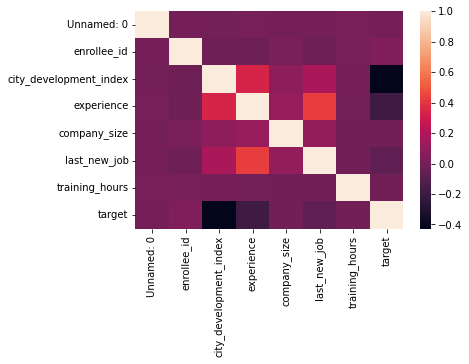

In [226]:
correlation = df.corr()
sns.heatmap(correlation)

# 2.) Feature Selection and Pre-processing 

Put all the data from the dataframe into X, except the enrolle_id and the target columns

In [227]:
y = df['target']
x = df
x = x.drop(columns = ['target'])
x = x.drop(columns = ['enrollee_id'])
#Also dropping the unnamed column that has meaningless values
x = x.iloc[: , 1:]
df = df.iloc[: , 1:]

Perform feature scaling on the data of X with StandardScaler and show some sample data from X after scaling (Use the technique shown in the second answer from this post:

In [228]:
scaler = StandardScaler()
scaler.fit(x)
scaledx = scaler.transform(x)
print(scaledx)

[[-0.50342203  0.63395707 -0.5747232   1.69076217 -0.30839586]
 [-0.57841303  1.54600905 -0.5747232   1.08113696 -0.95180478]
 [ 0.69643399 -0.88612956 -0.5747232  -0.74773864 -0.68784215]
 ...
 [ 0.69643399 -0.58211224 -1.0314958  -0.74773864 -0.67134448]
 [ 0.69643399  1.54600905 -0.5747232   1.08113696 -0.35788885]
 [-0.28678136 -1.64617288  0.338822   -0.13811344  0.51648738]]


# 3.) KMeans Clustering

Import related library for Kmeans and perform Kmeans on X (note that it was scaled already). Make sure to put random_state = 47 (it can be any number, but use 47 so that you will produce almost the same result as us). Use k-means++ for the initial centroids. You should know from the problem description how many clusters we are interested in.

In [229]:
kmeans1 = KMeans(n_clusters=2, random_state=47, init='k-means++').fit(scaledx)

Show the cluster centers as it is and then inverse the scale and show the centers. Please explain in words about the centers relating them to the columns of the data set

In [230]:
print(kmeans1.cluster_centers_)

[[-0.31364817 -0.63941844 -0.15207764 -0.55076921  0.01170319]
 [ 0.44177356  0.90062111  0.21420141  0.77575864 -0.01648395]]


In [231]:
inversed = scaler.inverse_transform(scaledx)
kmeans2 = KMeans(n_clusters=2, random_state=47, init='k-means++').fit(inversed)
print(kmeans2.cluster_centers_)

[[  0.83639888  10.83377685   3.26905531   2.23474625  41.97690553]
 [  0.83649939  10.81099796   3.21181263   2.19144603 167.34052953]]


# Answer: 
It appears that the training hours column was a big deciding factor on which cluster each point went to. All the other centers are pretty similar, but the training hours one has a difference of more than 100.

Show the distance matrix

In [232]:
#Scaled distance matrix
kmeans1.transform(scaledx)

array([[2.6387601 , 1.58409296],
       [2.93535149, 1.74579189],
       [1.3371321 , 2.57904978],
       ...,
       [1.51732572, 2.56222519],
       [2.96221279, 1.14612076],
       [1.2962834 , 2.85511871]])

In [233]:
#Inversed distance matrix
kmeans2.transform(inversed)

array([[  7.20067157, 120.45227649],
       [ 35.53186796, 159.68082008],
       [ 18.98273357, 143.46835926],
       ...,
       [ 17.59526544, 142.41372365],
       [ 10.59144068, 123.77983809],
       [ 56.08477703,  71.17110968]])

Show the labels

In [234]:
#Scaled
kmeans1.labels_

array([1, 1, 0, ..., 0, 1, 0], dtype=int32)

In [235]:
#Inversed
kmeans2.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Add a new column to your data frame called cluster_label and assign the cluster label for the instances based on the K-means cluster label

In [236]:
df['cluster_label'] = kmeans2.labels_.tolist()

The target column of our data frame is floating-point numbers. So, this number is not comparable with the cluster label. Add a column target_int and write a function or use a strategy to store the int version of the target column into the target_int column

In [237]:
yt = df['target']
df['target_int'] = yt.tolist()
df['target_int'] = df['target_int'].fillna(0).astype(int)

Show the top 5 rows of the dataframe now that shows you have added those two columns and they have the correct values

In [238]:
df.head()

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target,cluster_label,target_int
0,29725,0.776,15,2,5,47,0.0,0,0
1,666,0.767,21,2,4,8,0.0,0,0
2,28806,0.920,5,2,1,24,0.0,0,0
3,402,0.762,13,0,5,18,1.0,0,1
4,27107,0.920,7,2,1,46,1.0,0,1


Now, we would like to compare the cluster label with the ground truth. Print confusion matrix that compares the target_int and the cluster_label, show the classification_report, and then show the total number of misclassification.

In [239]:
print("Confusion Matrix: ")
tn, fp, fn, tp = confusion_matrix(df['cluster_label'], df['target_int']).ravel()
confusion_matrix(df['cluster_label'], df['target_int'])

Confusion Matrix: 


array([[8657, 1865],
       [2038,  417]])

In [240]:
print("Misclassification count: ", fp+fn)

Misclassification count:  3903


Discuss the numbers from 3 Viii and any thoughts on it.

# Answer: 
It doesn't predict very well but it predicts much better than when I left that unnamed column with random values in the dataframe.

Show the inertia of the cluster

In [241]:
print("Inertia: ", kmeans2.inertia_)

Inertia:  17054415.5567321


What is the elbow method and what is its purpose of it in the case of KMeans clustering?

# Answer: 
Elbow method is a method of determining the most optimal value of k when clustering. When plotting the inertia vs the values of k, it takes the point where the inertia stops decreasing in a steep linear fashion. That is considered the elbow of the graph and the best value for k.

Although we just wanted 2 clusters, we still would like to see what will happen if you increase the number of clusters. Plot the inertia for the different numbers of clusters from 2 to 20. 

In [242]:
inertia_list = []
for num_clusters in range(2, 20):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++", random_state=47)
    kmeans_model.fit(inversed)
    inertia_list.append(kmeans_model.inertia_)

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

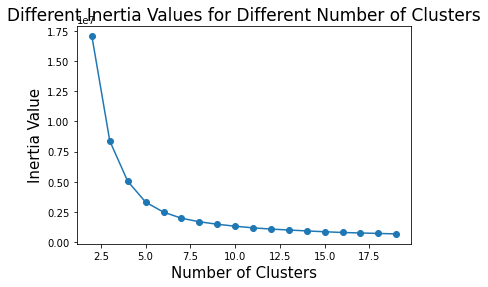

In [243]:
plt.plot(range(2,20),inertia_list)
plt.scatter(range(2,20),inertia_list)
plt.xlabel("Number of Clusters", size=15)
plt.ylabel("Inertia Value", size=15)
plt.title("Different Inertia Values for Different Number of Clusters", size=17)

Show a scatter plot with training hours against experience where the points should be colored based on the two cluster labels. Write any thoughts on this plot.

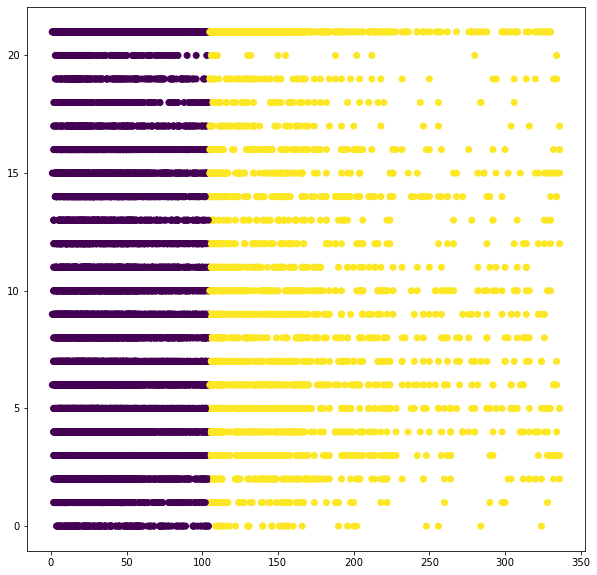

In [244]:
plt.figure(figsize=(10, 10))
plt.scatter(df['training_hours'], df['experience'], c=kmeans2.labels_)

# Answer: 
Very clear that training hours is a huge deciding factor for what cluster a datapoint is in

Show a scatter plot with any other two attributes you are interested in like 3 Xiii and add your thoughts on your plot as well

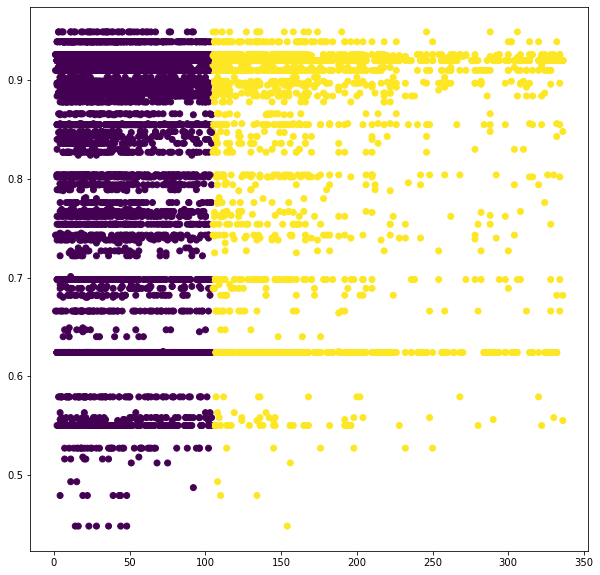

In [245]:
plt.figure(figsize=(10, 10))
plt.scatter(df['training_hours'], df['city_development_index'], c=kmeans2.labels_)

# Answer
My thoughts are that after playing with scatterplots for each attribute, this clustering method put a little too much faith in the training hours column as the clusters look more like walls where the training hours reach around 110.

# 4.) AgglomerativeClustering

Plot a dendrogram

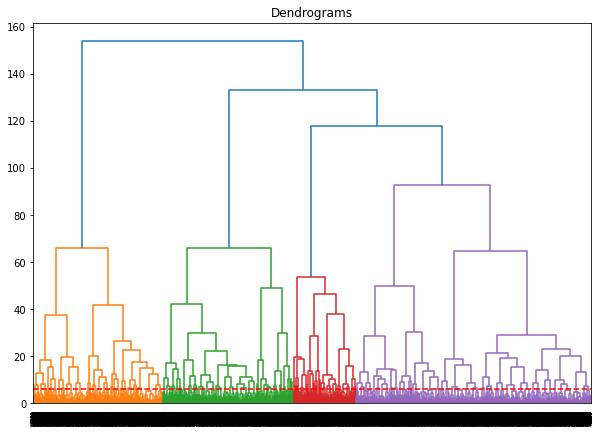

In [246]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaledx, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

Perform AgglomerativeClustering with 2 clusters first, and use euclidean distance for affinity and linkage = 'ward' 

In [247]:
clustering = AgglomerativeClustering(n_clusters = 2, linkage = 'ward', affinity = 'euclidean').fit(inversed)
tn, fp, fn, tp = confusion_matrix(clustering.labels_, df['target_int']).ravel()

In [248]:
print("Misclassification count: ", fp+fn)

Misclassification count:  3272


After creating the clusters, plot training hours against experience like 3.Xiii and discuss if anything interesting

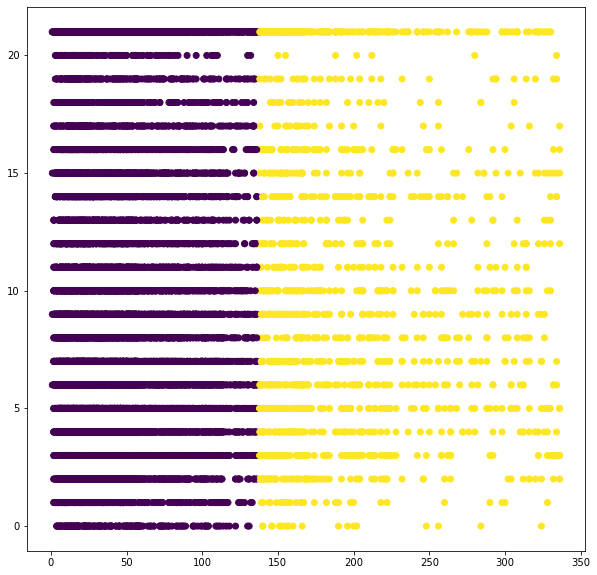

In [249]:
plt.figure(figsize=(10, 10))
plt.scatter(df['training_hours'], df['experience'], c=clustering.labels_)

# Answer: 
What's interesting is that this one bumped up the cluster decision wall to around 140. This one also has a better misclassification score so that must have been a good idea.

Then, increase the number of clusters to 4 or 5 and build the clusters again and plot them again to see any difference.

In [250]:
clustering2 = AgglomerativeClustering(n_clusters = 4, linkage = 'ward', affinity = 'euclidean').fit(inversed)

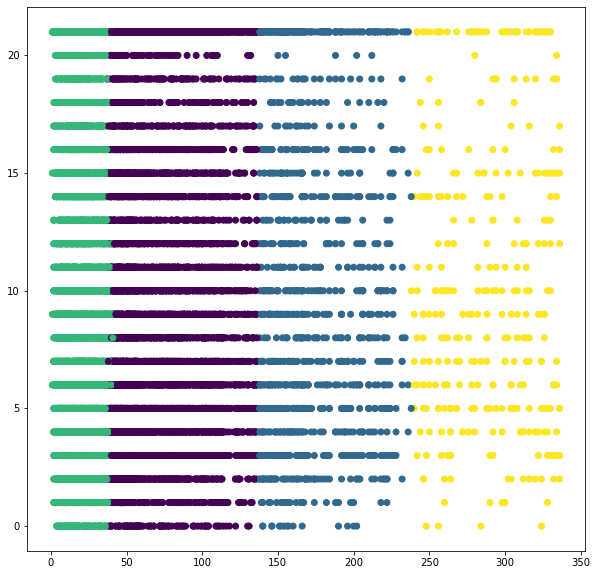

In [251]:
plt.figure(figsize=(10, 10))
plt.scatter(df['training_hours'], df['experience'], c=clustering2.labels_)